In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('SMSSpamCollection',sep = '\t', names = ['label','messages'])

In [3]:
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
df['label'] = encoder.fit_transform(df['label'])

df.head()

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# missing values
df.isnull().sum()

label       0
messages    0
dtype: int64

In [8]:
df.shape

(5572, 2)

2.EDA

In [9]:
df['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

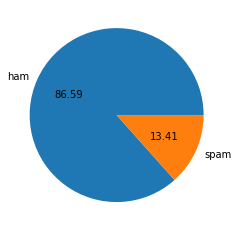

In [10]:
import matplotlib.pyplot as plt

plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [11]:
import re
import nltk

In [12]:
df['num_characters'] = df['messages'].apply(len)

df.head()

,label,messages,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
# num of words
df['num_words'] = df['messages'].apply(lambda x:len(nltk.word_tokenize(x)))

df.head()

,label,messages,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [14]:
df['num_sentences'] = df['messages'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head()

,label,messages,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [15]:
# ham
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.482487,17.424663,1.840415
std,58.440652,14.113530,1.452475
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [16]:
#spam
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.670683,27.993307,3.038822
std,28.873603,6.860440,1.548966
min,13.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [17]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

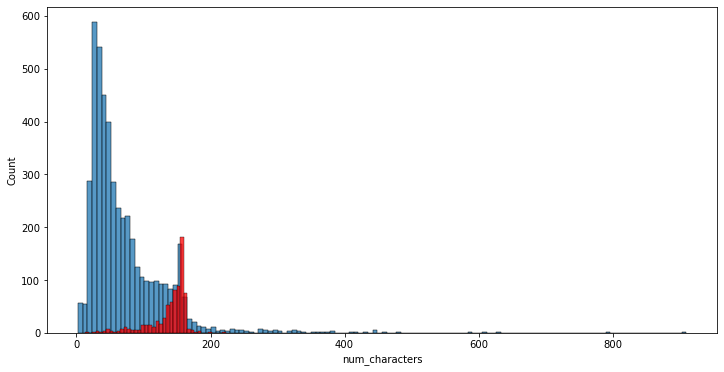

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

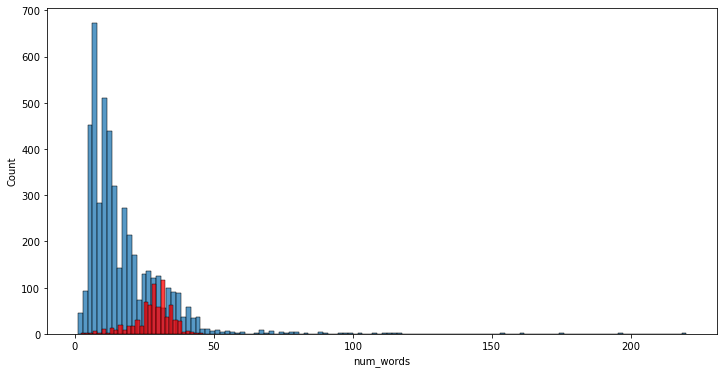

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

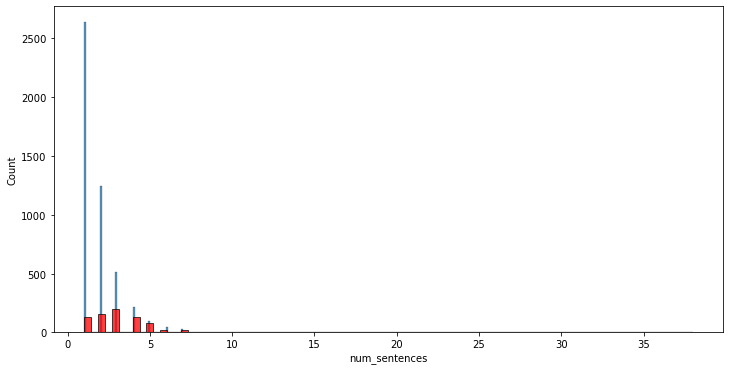

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_sentences'])
sns.histplot(df[df['label'] == 1]['num_sentences'],color='red')

<AxesSubplot:>

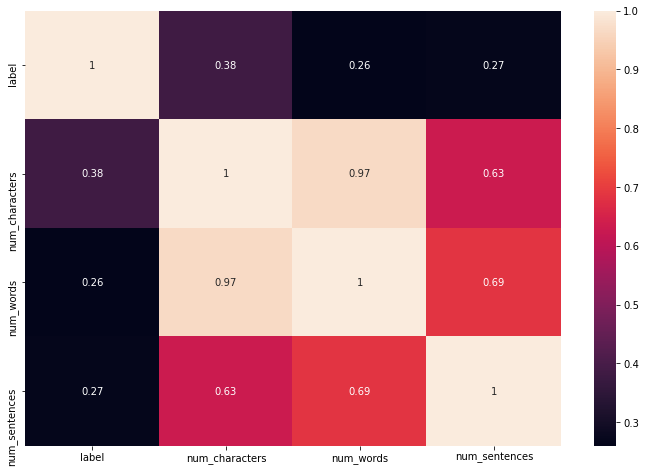

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

 Data Preprocessing
    
Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [22]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [23]:
df

,label,messages,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [24]:
def transform(text):

    review = re.sub('[^a-zA-Z]', ' ',text)
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [25]:
transform("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gonna home soon want talk stuff anymor tonight k cri enough today'

In [28]:
df['transformed_text'] = df['messages'].apply(transform)

df

,label,messages,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,nd time tri contact u u pound prize claim easi...
5568,0,Will ü b going to esplanade fr home?,36,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [29]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(df['transformed_text']).toarray()

In [30]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
y= df['label']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int32

In [32]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [33]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [35]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    conf_m = confusion_matrix(y_test,y_pred)
    
    print(accuracy)
    print(precision)
    print(conf_m)

In [36]:
train_classifier(rfc,X_train,y_train,X_test,y_test)

0.9820627802690582
0.9929577464788732
[[954   1]
 [ 19 141]]


In [37]:
from sklearn.naive_bayes import MultinomialNB

mlb = MultinomialNB()

In [38]:
train_classifier(mlb,X_train,y_train,X_test,y_test)

0.9856502242152466
0.9444444444444444
[[946   9]
 [  7 153]]


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
from sklearn.ensemble import StackingClassifier

In [41]:
# Applying stacking
estimators=[('rf', rfc), ('nb', mlb)]

final_estimator=LogisticRegression()

In [42]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [43]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.989237668161435
Precision 0.9868421052631579


In [44]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))